In [6]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [43]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
len(X_train)

60000

In [45]:
len(y_train)

60000

In [46]:
X_train[0].shape

(28, 28)

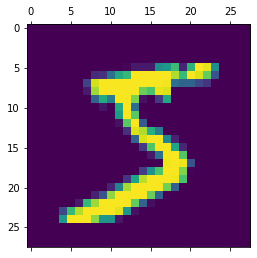

In [47]:
# to show the 28*28 image matrix 
plt.matshow(X_train[0])

In [48]:
y_train[0]

5

In [49]:
# to flatten the array from 28*28 into 1-d array i.e. 784
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [50]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [51]:
X_train_flattened[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [52]:
#creating a neural network 
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid' )
])

In [53]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [54]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 9.5075 - accuracy: 0.8418
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.0930 - accuracy: 0.8788
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.7491 - accuracy: 0.8844
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5814 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4411 - accuracy: 0.8873


##  scaling the value as trying again

In [55]:
X_train= X_train /255
X_test= X_test/255

X_train_flattened_scaled =  X_train.reshape(len(X_train), 28*28)
X_test_flattened_scaled = X_test.reshape(len(X_test), 28*28)
X_test_flattened_scaled.shape

(10000, 784)

In [56]:
scaled_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid' )
])

In [57]:
scaled_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
scaled_model.fit(X_train_flattened_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4680 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9260


In [77]:
scaled_model.evaluate(X_test_flattened_scaled, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2666 - accuracy: 0.9246


[0.2666392922401428, 0.9246000051498413]

In [68]:
predictions = model.predict(X_test_flattened_scaled)
predictions

313/313 [==============================] - 0s 1ms/step


array([[0.32008672, 0.19547826, 0.5154043 , ..., 0.79003406, 0.406521  ,
        0.55570954],
       [0.6122569 , 0.6235429 , 0.8588823 , ..., 0.06289987, 0.5191303 ,
        0.1372592 ],
       [0.26761153, 0.6733174 , 0.6096674 , ..., 0.571582  , 0.40634754,
        0.4722818 ],
       ...,
       [0.20392735, 0.39215958, 0.5079344 , ..., 0.6943264 , 0.49786445,
        0.66162884],
       [0.23856446, 0.4332489 , 0.37236345, ..., 0.50411385, 0.52552444,
        0.41547406],
       [0.41558814, 0.26718888, 0.6873155 , ..., 0.3165024 , 0.31946266,
        0.34103903]], dtype=float32)

In [64]:
np.argmax(predictions[0])

7

In [65]:
predictions_labels = [np.argmax(i) for i in predictions]
predictions_labels[:5]

[7, 5, 5, 0, 4]

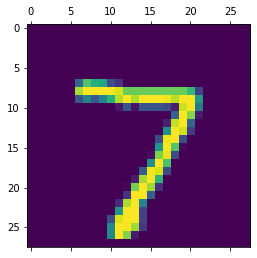

In [69]:
plt.matshow(X_test[0])

## Confusion Matrix

In [70]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[372,   0,   8,   0,   1, 586,   1,  12,   0,   0],
       [  0, 786,   4,   0,   0, 342,   0,   3,   0,   0],
       [  1,  11, 808,   0,  10, 183,   2,  16,   1,   0],
       [  0,   1,  36,  28,   0, 923,   0,  22,   0,   0],
       [  0,   0,   5,   0, 811, 145,   0,  20,   0,   1],
       [  0,   0,   0,   0,   2, 889,   1,   0,   0,   0],
       [  4,   2,  26,   0,  24, 324, 575,   3,   0,   0],
       [  0,   2,  14,   0,   4,  68,   0, 940,   0,   0],
       [  2,   5,  11,   0,   6, 923,   2,  16,   9,   0],
       [  1,   0,   6,   0,  75, 523,   0, 327,   0,  77]], dtype=int32)>

Text(69.0, 0.5, 'True')

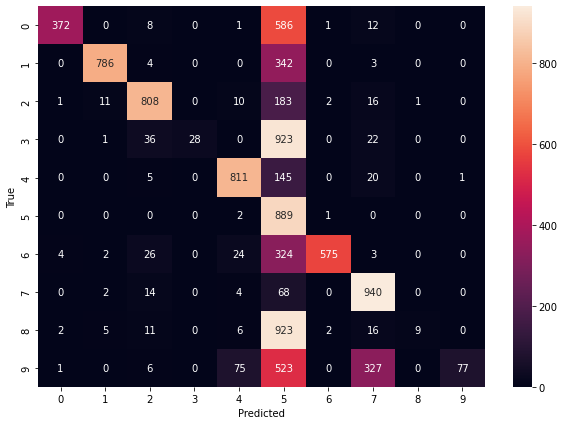

In [73]:
import seaborn as sns 
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [74]:
## adding hidden layers to increase performance
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu' ),
    keras.layers.Dense(10,activation='sigmoid' )
])

In [75]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [76]:
model2.fit(X_train_flattened_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1220 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9843


In [78]:
model2.evaluate(X_test_flattened_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0822 - accuracy: 0.9742


[0.08215313404798508, 0.9742000102996826]

In [79]:
pred = model2.predict(X_test_flattened_scaled)
pred_labels = [np.argmax(i) for i in pred] 

313/313 [==============================] - 1s 1ms/step


Text(69.0, 0.5, 'True')

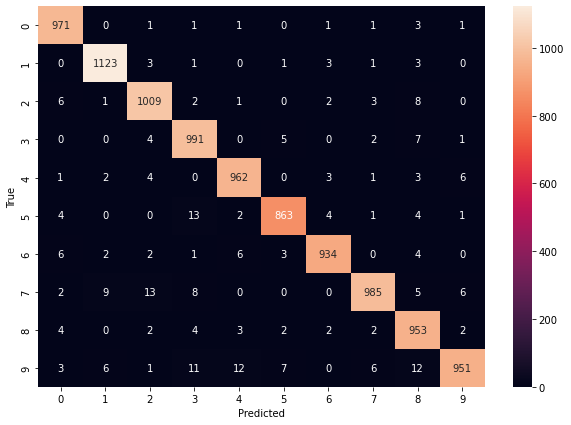

In [80]:
cm2 = tf.math.confusion_matrix(labels = y_test, predictions=pred_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [87]:
# using flattening feature from the library 
model_demo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu' ),
    keras.layers.Dense(10,activation='sigmoid' )
])

model_demo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_demo.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2650 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1207 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0832 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0640 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0495 - accuracy: 0.9852
